{(0, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcca0080490>,
 (0, 0, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcc6ff3f100>,
 (0, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcc6ff3f4c0>,
 (0, 1, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcc6ff3f880>,
 (0, 2, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcc6ff3fc40>,
 (0, 2, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcc6ff3ff40>,
 (0, 3, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcc6feca400>,
 (0, 3, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcc6feca7c0>,
 (0, 4, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcc6fecab80>,
 (0, 4, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcc6fecaf40>,
 (1, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcc6fed8340>,
 (1, 0, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcc6fed8700>,
 (1, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fcc6fed8ac0>,

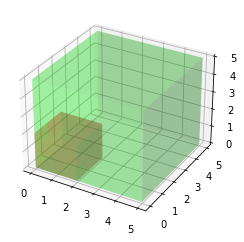

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import timeit

# https://matplotlib.org/stable/gallery/mplot3d/voxels.html

# Create axis
axes = [2, 2, 2] 
axes2 = [5, 5, 5]

# Create Data
data1 = np.ones(axes, dtype=np.bool)
data2 = np.ones(axes2, dtype=np.bool)

# Control Transparency
alpha = 0.2

# Control colour
colors = np.empty(axes + [4], dtype=np.float32)
colors2 = np.empty(axes2 + [4], dtype=np.float)

colors[:] = [1, 0, 0, alpha]  # red
colors2[:] = [0, 1, 0, alpha]

# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.voxels(data1, facecolors=colors)
ax.voxels(data2, facecolors=colors2)


    
    


[[[ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]]

 [[ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True  True  True  True  True]
  [ True  True  True  True  True  True

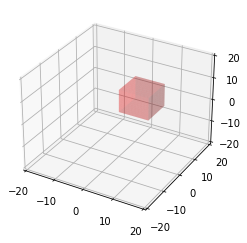

In [3]:
def plotCube(x_range, y_range, z_range, fig):
    scale_fact = 2 
    x_min = -scale_fact * x_range; x_max = scale_fact * x_range
    y_min = -scale_fact * y_range; y_max = scale_fact * y_range
    z_min = -scale_fact * z_range; z_max = scale_fact * z_range
    axes = [x_range, y_range, z_range]
    # Print shape
    data = np.ones(axes, dtype=np.bool)
    print(data)
    # Data shape is: 
    print("Data.shape is: {}".format(data.shape))
    alpha = 0.2
    colors = np.empty(axes + [4], dtype=np.float32)
    colors[:] = [1, 0, 0, alpha] # red
    # This needs to be extracted out :) --> to prevent from drawing over it 
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(x_min, x_max); ax.set_ylim(y_min, y_max); ax.set_zlim(z_min, z_max)
    ax.voxels(data, facecolors=colors)
    #return ax
    #ax.view_init(100, 90)


import time
start_time = time.time()
fig_ = plt.figure()
plotCube(10, 10, 10, fig_)
end_time = time.time()
duration = end_time - start_time
print("Duration of the plotCube is: {}".format(duration))

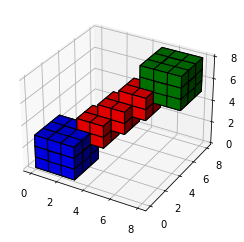

In [36]:
import matplotlib.pyplot as plt
import numpy as np


# prepare some coordinates
x, y, z = np.indices((8, 8, 8))

# draw cuboids in the top left and bottom right corners, and a link between
# them
cube1 = (x < 3) & (y < 3) & (z < 3)
# Basically python conditions
cube2 = (x >= 5) & (y >= 5) & (z >= 5)
link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

# combine the objects into a single boolean array
voxelarray = cube1 | cube2 | link

# set the colors of each object
colors = np.empty(voxelarray.shape, dtype=object)
colors[link] = 'red'
colors[cube1] = 'blue'
colors[cube2] = 'green'

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxelarray, facecolors=colors, edgecolor='k')

plt.show()


In [22]:
x = np.linspace(-4, 4, 9)
y = np.linspace(-5, 5, 11)
z = np.linspace(-5, 5, 11)
# The meshgrid function returns
# two 2-dimensional arrays
x, y, z = np.meshgrid(x, y, z)


cube1 = (2>x.any()>-2) & (2>y.any()>-2) & (2>z.any()>-2)

voxelarray = cube1


True


In [25]:
x, y, z = np.indices((8, 8, 8))-4

In [26]:
print(x)

[[[-4 -4 -4 -4 -4 -4 -4 -4]
  [-4 -4 -4 -4 -4 -4 -4 -4]
  [-4 -4 -4 -4 -4 -4 -4 -4]
  [-4 -4 -4 -4 -4 -4 -4 -4]
  [-4 -4 -4 -4 -4 -4 -4 -4]
  [-4 -4 -4 -4 -4 -4 -4 -4]
  [-4 -4 -4 -4 -4 -4 -4 -4]
  [-4 -4 -4 -4 -4 -4 -4 -4]]

 [[-3 -3 -3 -3 -3 -3 -3 -3]
  [-3 -3 -3 -3 -3 -3 -3 -3]
  [-3 -3 -3 -3 -3 -3 -3 -3]
  [-3 -3 -3 -3 -3 -3 -3 -3]
  [-3 -3 -3 -3 -3 -3 -3 -3]
  [-3 -3 -3 -3 -3 -3 -3 -3]
  [-3 -3 -3 -3 -3 -3 -3 -3]
  [-3 -3 -3 -3 -3 -3 -3 -3]]

 [[-2 -2 -2 -2 -2 -2 -2 -2]
  [-2 -2 -2 -2 -2 -2 -2 -2]
  [-2 -2 -2 -2 -2 -2 -2 -2]
  [-2 -2 -2 -2 -2 -2 -2 -2]
  [-2 -2 -2 -2 -2 -2 -2 -2]
  [-2 -2 -2 -2 -2 -2 -2 -2]
  [-2 -2 -2 -2 -2 -2 -2 -2]
  [-2 -2 -2 -2 -2 -2 -2 -2]]

 [[-1 -1 -1 -1 -1 -1 -1 -1]
  [-1 -1 -1 -1 -1 -1 -1 -1]
  [-1 -1 -1 -1 -1 -1 -1 -1]
  [-1 -1 -1 -1 -1 -1 -1 -1]
  [-1 -1 -1 -1 -1 -1 -1 -1]
  [-1 -1 -1 -1 -1 -1 -1 -1]
  [-1 -1 -1 -1 -1 -1 -1 -1]
  [-1 -1 -1 -1 -1 -1 -1 -1]]

 [[ 0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0]
  [ 0  0  0 

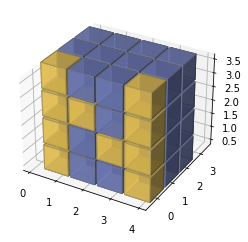

In [38]:
import matplotlib.pyplot as plt
import numpy as np


def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

# build up the numpy logo
n_voxels = np.zeros((4, 3, 4), dtype=bool)
n_voxels[0, 0, :] = True
n_voxels[-1, 0, :] = True
n_voxels[1, 0, 2] = True
n_voxels[2, 0, 1] = True
facecolors = np.where(n_voxels, '#FFD65DC0', '#7A88CCC0')
edgecolors = np.where(n_voxels, '#BFAB6E', '#7D84A6')
filled = np.ones(n_voxels.shape)

# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)
ax.set_aspect('equal')

plt.show()